In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# User Functions
def subsampleavg_single(x,binLength=2):
    # Deal with exception
    if binLength < 1: return None
    elif binLength == 1: return x
    elif binLength >= len(x): return np.array([np.mean(x)])
    
    # Prepare variables
    allowableLength = int(len(x)/binLength) * binLength
    binArrayLength = int(len(x)/binLength)
    
    # Bin the array and take mean
    x_bin = np.reshape(x[:allowableLength],(binArrayLength,binLength))
    x_bin = np.mean(x_bin,axis=1)
    
    # If there are leftover elements, append it to the end
    if allowableLength != len(x): 
        x_bin = np.append(x_bin, np.mean(x[allowableLength:]))
    
    # return the results
    return x_bin

# Binning fixed neighbors

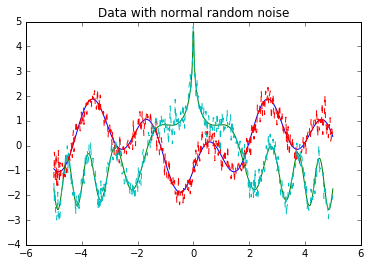

In [3]:
x = np.linspace(-5,5,500)
y1 = np.sin(3*x) - np.cos(x)
y2 = np.sin(x**2) - np.log(np.abs(x))
plt.plot(x,y1,x,y2)

y1 = y1 + np.random.normal(0.0, 0.3, y1.shape )
y2 = y2 + np.random.normal(0.0, 0.3, y2.shape )
plt.plot(x,y1,'--',x,y2,'--')

plt.title('Data with normal random noise')

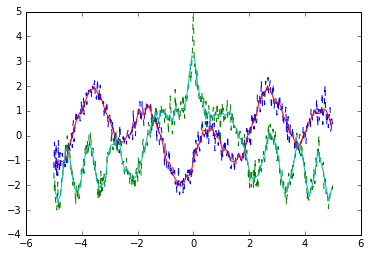

In [4]:
# Binning the data
binLen = 5
binDataSize = int(len(x)/binLen)
x_bin = np.zeros(binDataSize)
y1_bin = np.zeros(binDataSize)
y2_bin = np.zeros(binDataSize)

for i in range(binDataSize):
    x_bin[i] = np.mean(x[i*binLen:(i+1)*binLen])
    y1_bin[i] = np.mean(y1[i*binLen:(i+1)*binLen])
    y2_bin[i] = np.mean(y2[i*binLen:(i+1)*binLen])

plt.plot(x,y1,'--',x,y2,'--')
plt.plot(x_bin,y1_bin,x_bin,y2_bin)

# Binning with edges

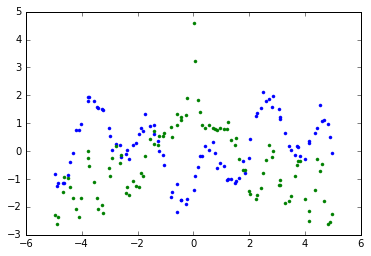

In [5]:
# Generate data with random noise in x and y
x = np.linspace(-5,5,100)
x = x + np.random.normal(0.0,10/100/2,x.shape)
y1 = np.sin(3*x) - np.cos(x)
y2 = np.sin(x**2) - np.log(np.abs(x))
y1 = y1 + np.random.normal(0.0, 0.2, y1.shape )
y2 = y2 + np.random.normal(0.0, 0.2, y2.shape )
plt.plot(x,y1,'.',x,y2,'.')

In [7]:
# Bin the data
binDataSize = 50
binLimits = [-5,5]
binArray = np.linspace(binLimits[0],binLimits[1],binDataSize)
binDelta = binArray[1]-binArray[0]
binIndices = np.digitize(x, binArray)

x_bin = np.zeros(binDataSize)
y1_bin = np.zeros(binDataSize)
y2_bin = np.zeros(binDataSize)

#for i in enumerate(x_bin):
#    binMembers = []
#    for j,binLocation in enumerate(binIndices):
#        if binLocation

# Data Filtering

In [8]:
import scipy.ndimage
import scipy.fftpack

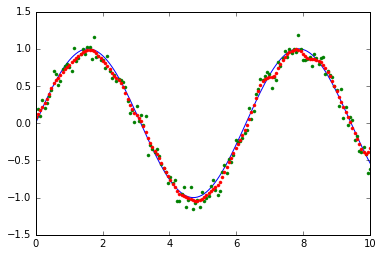

In [9]:
# Gaussian filter
x = np.linspace(0,10,150)
y = np.sin(x)
yn = y + np.random.normal(scale=0.1,size=x.shape)

ynr = scipy.ndimage.filters.gaussian_filter(yn, sigma = 2, mode='constant', order=0)
plt.plot(x,y)
plt.plot(x,yn,'.')
plt.plot(x,ynr,'.')

(0, 10)

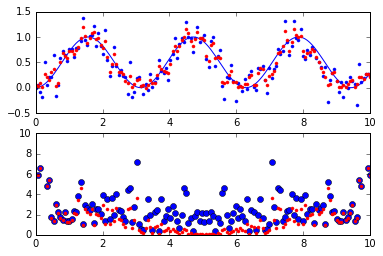

In [10]:
# Gaussian fourier filter
x = np.linspace(0,10,150)
y = np.sin(x)**2
yn = y + np.random.normal(scale=0.2,size=x.shape)

ynfft = scipy.fftpack.fft(yn)
ynfft_filtered = scipy.ndimage.fourier.fourier_gaussian(ynfft,sigma=1)
ynfft_filtered = scipy.ndimage.fourier.fourier_ellipsoid(ynfft,size=5)
ynfft_filtered = scipy.ndimage.fourier.fourier_uniform(ynfft,size=2)
ynr = np.abs(scipy.fftpack.ifft(ynfft_filtered))
plt.subplot(2,1,1)
plt.plot(x,y)
plt.plot(x,yn,'b.')
plt.plot(x,ynr,'r.')
plt.ylim([-0.5,1.5])
plt.subplot(2,1,2)
plt.plot(x,np.abs(ynfft),'bo')
plt.plot(x,np.abs(ynfft_filtered),'r.')
plt.ylim([0,10])

# Numerical Derivative via Polynomial Fitting

(-15, 15)

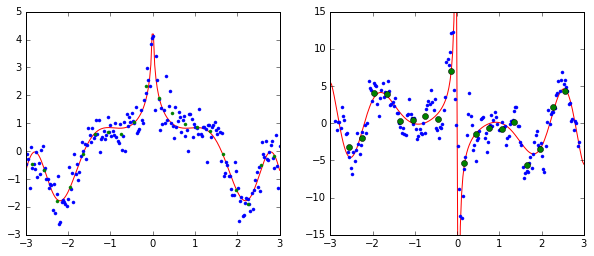

In [11]:
def numder_poly(x,y,order=2,points=1):
    # Prepare outputs
    dydx = np.zeros_like(y)
    
    # Calculate useful variables
    start_index = points
    end_index = len(x) - points # not including
    
    # Bulk points
    for i in range(start_index, end_index):
        fitx = x[i-points:i+points+1]
        fity = y[i-points:i+points+1]
        
        fitpoly = np.poly1d(np.polyfit(fitx,fity,order))
        fitpolyder = np.polyder(fitpoly)
        
        dydx[i] = fitpolyder(x[i])
    
    # Edge points
    for i in range(0,start_index): # Begging points
        dydx[i] = np.nan
    
    for i in range(end_index,len(x)): # End points
        dydx[i] = np.nan
    
    # Return results
    return dydx

# Usage
x = np.linspace(-3,3,200)
y1 = np.sin(x**2) - np.log(np.abs(x))
dy1 = np.gradient(y1,(x[1]-x[0]))

y1n = y1 + np.random.normal(scale = 0.5, size = x.shape)
dy1n = numder_poly(x,y1n,order=2,points=4)

#binLength = 2
#x2 = subsampleavg_single(x,binLength=binLength)
#y1n2 = subsampleavg_single(y1n,binLength=binLength)
#dy1n2 = numder_poly(x2,y1n2,order=2,points=2)

binLength = 10
x2 = subsampleavg_single(x,binLength=binLength)
y1n2 = subsampleavg_single(y1n,binLength=binLength)
dy1n2 = subsampleavg_single(dy1n,binLength=binLength)

fig,axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
axes[0].plot(x,y1,'r-')
axes[0].plot(x,y1n,'b.')
axes[0].plot(x2,y1n2,'g.')

axes[1].plot(x,dy1,'r-')
axes[1].plot(x,dy1n,'b.')
axes[1].plot(x2,dy1n2,'go')
axes[1].set_ylim([-15,15])